In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('BreadBasket_DMS.csv')


In [3]:
print(df)

             Date      Time  Transaction                  Item
0      2016-10-30  09:58:11            1                 Bread
1      2016-10-30  10:05:34            2          Scandinavian
2      2016-10-30  10:05:34            2          Scandinavian
3      2016-10-30  10:07:57            3         Hot chocolate
4      2016-10-30  10:07:57            3                   Jam
5      2016-10-30  10:07:57            3               Cookies
6      2016-10-30  10:08:41            4                Muffin
7      2016-10-30  10:13:03            5                Coffee
8      2016-10-30  10:13:03            5                Pastry
9      2016-10-30  10:13:03            5                 Bread
10     2016-10-30  10:16:55            6             Medialuna
11     2016-10-30  10:16:55            6                Pastry
12     2016-10-30  10:16:55            6                Muffin
13     2016-10-30  10:19:12            7             Medialuna
14     2016-10-30  10:19:12            7               

In [4]:
df.columns

Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')

Get a list of top selling bakery items
The owner should keep these items in stock more often

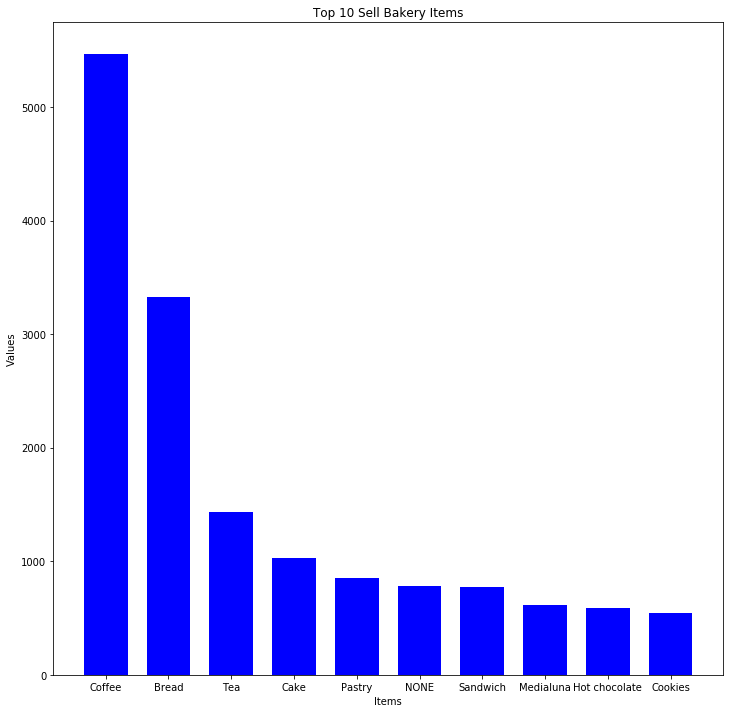

In [5]:
itemNames = df['Item'].value_counts().head(10).index
itemValues = df['Item'].value_counts().head(10).values

plt.figure(figsize=(12,12))
plt.ylabel('Values', fontsize='medium')
plt.xlabel('Items', fontsize='medium')
plt.title('Top 10 Sell Bakery Items')
plt.bar(itemNames, itemValues, width = 0.7, color="blue",linewidth=0.4)
plt.show()

Get a list of items that aren't selling well.  We should consider removing these items from the menu.

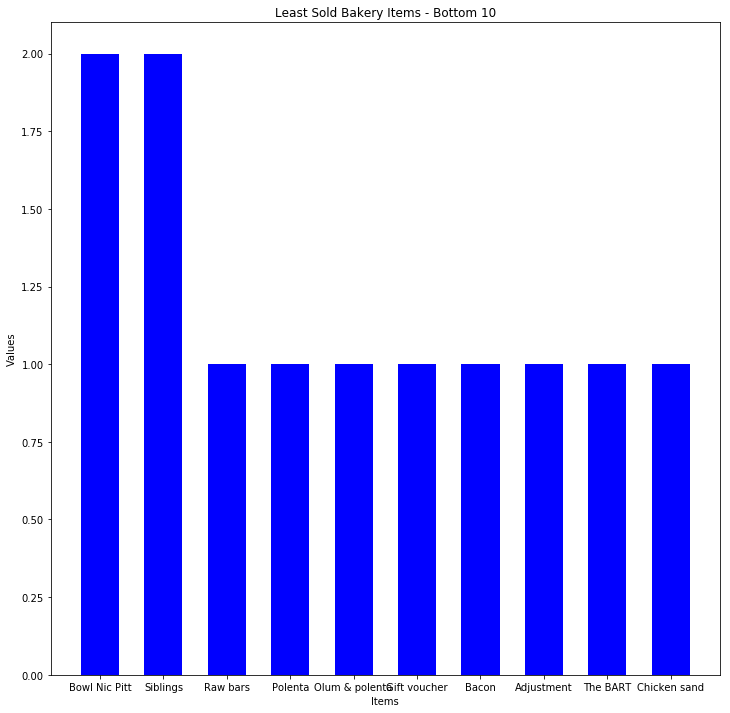

In [6]:
itemNames = df['Item'].value_counts().tail(10).index
itemValues = df['Item'].value_counts().tail(10).values

plt.figure(figsize=(12,12))
plt.ylabel('Values', fontsize='medium')
plt.xlabel('Items', fontsize='medium')
plt.title('Least Sold Bakery Items - Bottom 10')
plt.bar(itemNames, itemValues, width = 0.6, color="blue",linewidth=0.4)
plt.show()

Build date columns

In [7]:
df['Date_Time'] = pd.to_datetime(df['Date']+ ' ' + df['Time'])
df['Day'] = df['Date_Time'].dt.day_name()
df['Month'] = df['Date_Time'].dt.month
df['Month_name'] = df['Date_Time'].dt.month_name()
df['Year'] = df['Date_Time'].dt.year
df['Year_Month'] = df['Year'].apply(str)+' '+ df['Month_name'].apply(str)
#df.drop(['Date','Time'], axis=1, inplace=True)

df.index=df['Date_Time']
df.index.name='Date'
df.drop(['Date_Time'],axis=1,inplace=True)
df.head()

,Date,Time,Transaction,Item,Day,Month,Month_name,Year,Year_Month
Date,,,,,,,,,
2016-10-30 09:58:11,2016-10-30,09:58:11,1,Bread,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2016-10-30,10:05:34,2,Scandinavian,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2016-10-30,10:05:34,2,Scandinavian,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,2016-10-30,10:07:57,3,Hot chocolate,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,2016-10-30,10:07:57,3,Jam,Sunday,10,October,2016,2016 October


Determine the busy period for the company and staff up your seasonal employees accordingly

Find out when your store is the busiest make sure your staff is there to sell.

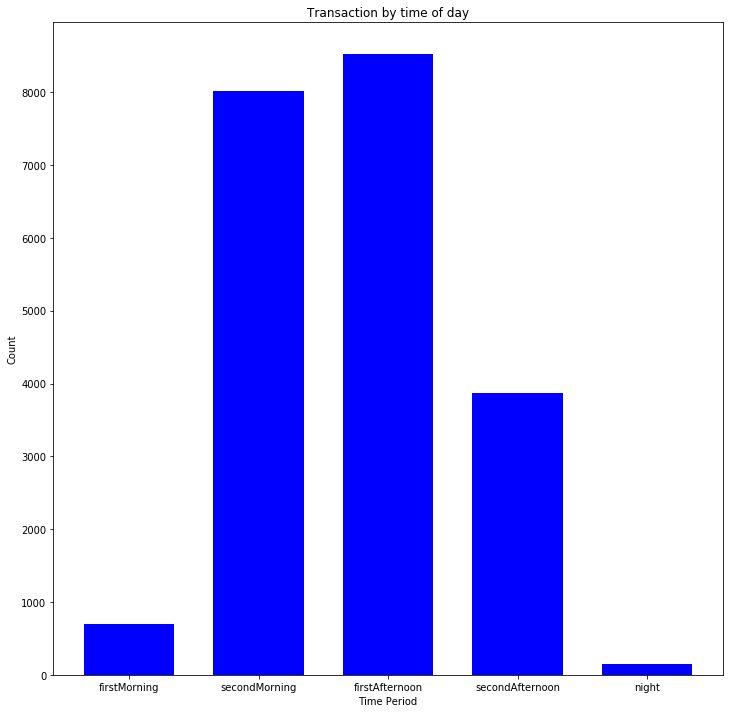

In [8]:
firstMorning = df.loc[(df['Time']>='06:00:00')&(df['Time']<'09:00:00')]
secondMorning = df.loc[(df['Time']>='09:00:00')&(df['Time']<'12:00:00')]
firstAfternoon = df.loc[(df['Time']>='12:00:00')&(df['Time']<'15:00:00')]
secondAfternoon = df.loc[(df['Time']>='15:00:00')&(df['Time']<'18:00:00')]
night = df.loc[(df['Time']>='18:00:00')&(df['Time']<'21:00:00')]

itemNames = ['firstMorning','secondMorning','firstAfternoon','secondAfternoon','night']
itemValues = [len(firstMorning),len(secondMorning),len(firstAfternoon),len(secondAfternoon),len(night)]
plt.figure(figsize=(12,12))
plt.ylabel('Count', fontsize='medium')
plt.xlabel('Time Period', fontsize='medium')
plt.title('Transaction by time of day')
plt.bar(itemNames, itemValues, width = 0.7, color="blue",linewidth=0.4)
plt.show()

In [9]:
df.loc[df['Year_Month'] == '2016 October']

,Date,Time,Transaction,Item,Day,Month,Month_name,Year,Year_Month
Date,,,,,,,,,
2016-10-30 09:58:11,2016-10-30,09:58:11,1,Bread,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2016-10-30,10:05:34,2,Scandinavian,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2016-10-30,10:05:34,2,Scandinavian,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,2016-10-30,10:07:57,3,Hot chocolate,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,2016-10-30,10:07:57,3,Jam,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,2016-10-30,10:07:57,3,Cookies,Sunday,10,October,2016,2016 October
2016-10-30 10:08:41,2016-10-30,10:08:41,4,Muffin,Sunday,10,October,2016,2016 October
2016-10-30 10:13:03,2016-10-30,10:13:03,5,Coffee,Sunday,10,October,2016,2016 October
2016-10-30 10:13:03,2016-10-30,10:13:03,5,Pastry,Sunday,10,October,2016,2016 October


In [10]:
df['Year_Month_Transaction'] = df['Year_Month'].apply(str) + '_'+ df['Transaction'].apply(str)

In [11]:
df['Year_Month_Transaction'].value_counts()

2017 February_6474    12
2017 February_6279    11
2017 February_6412    11
2017 February_6716    11
2017 February_7245    10
2016 December_3673    10
2017 March_8835       10
2017 April_9447       10
2017 February_6045    10
2017 February_6038     9
2017 February_6290     9
2016 December_3799     9
2017 April_9534        9
2017 February_6519     9
2017 February_6730     8
2017 January_5455      8
2017 April_9492        8
2017 March_7803        8
2016 December_3529     8
2017 January_5562      8
2017 February_6778     8
2016 November_482      8
2016 December_3917     8
2017 March_7397        8
2017 February_6331     8
2017 March_8792        8
2017 February_6617     8
2017 March_8011        8
2017 February_6056     8
2017 January_5062      8
                      ..
2017 February_6397     1
2017 January_5085      1
2016 December_3841     1
2016 December_2558     1
2016 December_4029     1
2017 January_4466      1
2016 December_3717     1
2016 December_2684     1
2016 December_3137     1


In [12]:
df.loc[(df['Year_Month_Transaction'] == '2017 February_6474')]

,Date,Time,Transaction,Item,Day,Month,Month_name,Year,Year_Month,Year_Month_Transaction
Date,,,,,,,,,,
2017-02-12 14:35:34,2017-02-12,14:35:34,6474,Coffee,Sunday,2,February,2017,2017 February,2017 February_6474
2017-02-12 14:35:34,2017-02-12,14:35:34,6474,Coffee,Sunday,2,February,2017,2017 February,2017 February_6474
2017-02-12 14:35:34,2017-02-12,14:35:34,6474,Coffee,Sunday,2,February,2017,2017 February,2017 February_6474
2017-02-12 14:35:34,2017-02-12,14:35:34,6474,Tea,Sunday,2,February,2017,2017 February,2017 February_6474
2017-02-12 14:35:34,2017-02-12,14:35:34,6474,Toast,Sunday,2,February,2017,2017 February,2017 February_6474
2017-02-12 14:35:34,2017-02-12,14:35:34,6474,Duck egg,Sunday,2,February,2017,2017 February,2017 February_6474
2017-02-12 14:35:34,2017-02-12,14:35:34,6474,Extra Salami or Feta,Sunday,2,February,2017,2017 February,2017 February_6474
2017-02-12 14:35:34,2017-02-12,14:35:34,6474,Chicken Stew,Sunday,2,February,2017,2017 February,2017 February_6474
2017-02-12 14:35:34,2017-02-12,14:35:34,6474,NONE,Sunday,2,February,2017,2017 February,2017 February_6474


In [13]:
df.groupby(['Year_Month','Transaction'])

side by side plot on monthly company statistics

C:\Users\Po\AppData\Roaming\Python\Python37\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


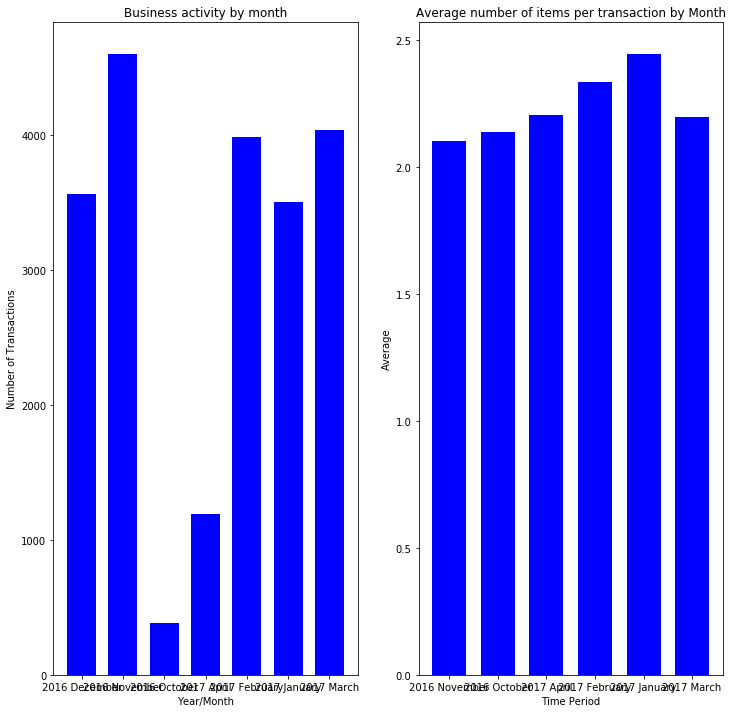

['2016 November', '2016 October', '2017 April', '2017 February', '2017 January', '2017 March']
[2.10436320754717, 2.138875986994891, 2.206896551724138, 2.337917485265226, 2.4481276856967464, 2.1966186599874766]


In [14]:

plt.figure(figsize=(12,12))
itemNames = df.groupby('Year_Month')['Item'].count().index
itemValues = df.groupby('Year_Month')['Item'].count().values
plt.subplot(1,2,1)
plt.ylabel('Number of Transactions', fontsize='medium')
plt.xlabel('Year/Month', fontsize='medium')
plt.title('Business activity by month')
plt.bar(itemNames, itemValues, width = 0.7, color="blue",linewidth=0.4)


grouped = df.groupby(['Year_Month','Transaction']).agg({'Transaction': { 'result': ['count']}})
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
prev_month = ''
total = 0
count = 0

itemNames = []
itemValues = []
avg = 0

for name in grouped.index:
    if prev_month != name[0] and prev_month !=  '':
        #print(name[0], total / count)
        avg = total / count
        itemNames.append(name[0])
        itemValues.append(float(avg))
        total = 0
        count = 0
    else:
        total += grouped.loc[name]
        count += 1
    prev_month = name[0]

plt.subplot(1,2,2)
plt.ylabel('Average', fontsize='medium')
plt.xlabel('Time Period', fontsize='medium')
plt.title('Average number of items per transaction by Month')
plt.bar(itemNames, itemValues, width = 0.7, color="blue",linewidth=0.4)

plt.show()
print(itemNames)
print(itemValues)